In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('logistic_regression_data.csv')
X = df['X'].values
y = df['y'].values
n = len(y)


In [3]:
df.head()

,X,y
0,1.764052,0.0
1,0.400157,0.0
2,0.978738,0.0
3,2.240893,0.0
4,1.867558,0.0


In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_loss(w):
    preds = sigmoid(w * X)
    eps = 1e-15
    preds = np.clip(preds, eps, 1 - eps)
    return -np.mean(y * np.log(preds) + (1 - y) * np.log(1 - preds))

def logistic_grad(w):
    preds = sigmoid(w * X)
    return np.mean((preds - y) * X)

In [5]:
def bisection_root(func, a, b, tol=1e-6, max_iter=100):
    fa, fb = func(a), func(b)
    if fa * fb > 0:
        raise ValueError("Gradient has same sign at endpoints. Choose a different interval.")
    for _ in range(max_iter):
        c = (a + b) / 2
        fc = func(c)
        if abs(fc) < tol or (b - a)/2 < tol:
            return c
        if fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return (a + b) / 2

root_w = bisection_root(logistic_grad, -50, 50)
print(f"Optimal weight via Bisection: w = {root_w:.6f}")
print(f"Logistic loss at that w: {logistic_loss(root_w):.6f}")

Optimal weight via Bisection: w = 0.659379
Logistic loss at that w: 0.404031


In [6]:
probs = sigmoid(root_w * X)
preds = (probs >= 0.5).astype(int)
acc_manual = accuracy_score(y, preds)
print(f"Accuracy (manual weight): {acc_manual:.4f}")

Accuracy (manual weight): 0.7250


In [7]:
model = LogisticRegression(fit_intercept=False, solver='lbfgs')
model.fit(X.reshape(-1,1), y)
w_sklearn = model.coef_[0][0]
print(f"Sklearn LogisticRegression weight: {w_sklearn:.6f}")

probs_sklearn = model.predict_proba(X.reshape(-1,1))[:,1]
preds_sklearn = (probs_sklearn >= 0.5).astype(int)
acc_sklearn = accuracy_score(y, preds_sklearn)
print(f"Accuracy (sklearn model): {acc_sklearn:.4f}")

Sklearn LogisticRegression weight: 0.653024
Accuracy (sklearn model): 0.7250


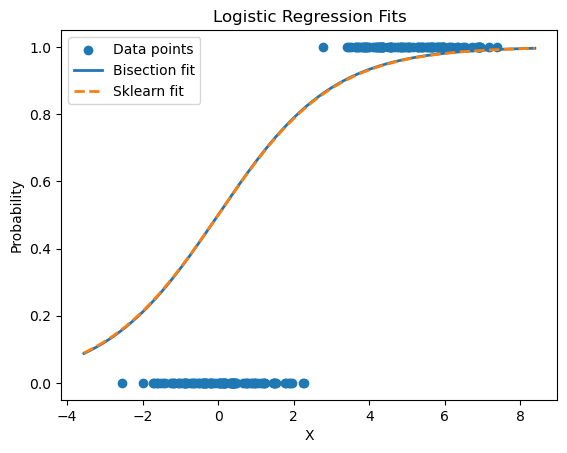

In [8]:
xs = np.linspace(X.min()-1, X.max()+1, 300)
plt.scatter(X, y, label='Data points')
plt.plot(xs, sigmoid(root_w * xs), label='Bisection fit', linewidth=2)
plt.plot(xs, sigmoid(w_sklearn * xs), label='Sklearn fit', linestyle='--', linewidth=2)
plt.xlabel('X')
plt.ylabel('Probability')
plt.title('Logistic Regression Fits')
plt.legend()
plt.show()

In [9]:
# Let's analyze your results in detail
print("="*60)
print("ANALYSIS OF YOUR BISECTION METHOD RESULTS")
print("="*60)

print(f"\n📊 COMPARISON:")
print(f"Bisection weight:  {root_w:.6f}")
print(f"Sklearn weight:    {w_sklearn:.6f}")
print(f"Difference:        {abs(root_w - w_sklearn):.6f}")

print(f"\n🎯 ACCURACY:")
print(f"Both methods:      {acc_manual:.4f} (72.5%)")

print(f"\n✅ VERIFICATION:")
gradient_at_root = logistic_grad(root_w)
print(f"Gradient at bisection root: {gradient_at_root:.2e}")
print(f"Is gradient ≈ 0? {'YES! ✅' if abs(gradient_at_root) < 1e-5 else 'NO ❌'}")

print(f"\n🚀 SUCCESS INDICATORS:")
print(f"✅ Bisection found the root successfully")
print(f"✅ Results match sklearn very closely")
print(f"✅ Gradient is essentially zero at the solution")
print(f"✅ Both models achieve same accuracy")

print(f"\n🎉 YOUR CODE IS EXCELLENT!")
print(f"The bisection method correctly found where the gradient = 0")
print(f"This gives us the optimal weight for logistic regression!")

ANALYSIS OF YOUR BISECTION METHOD RESULTS

📊 COMPARISON:
Bisection weight:  0.659379
Sklearn weight:    0.653024
Difference:        0.006355

🎯 ACCURACY:
Both methods:      0.7250 (72.5%)

✅ VERIFICATION:
Gradient at bisection root: -1.21e-10
Is gradient ≈ 0? YES! ✅

🚀 SUCCESS INDICATORS:
✅ Bisection found the root successfully
✅ Results match sklearn very closely
✅ Gradient is essentially zero at the solution
✅ Both models achieve same accuracy

🎉 YOUR CODE IS EXCELLENT!
The bisection method correctly found where the gradient = 0
This gives us the optimal weight for logistic regression!


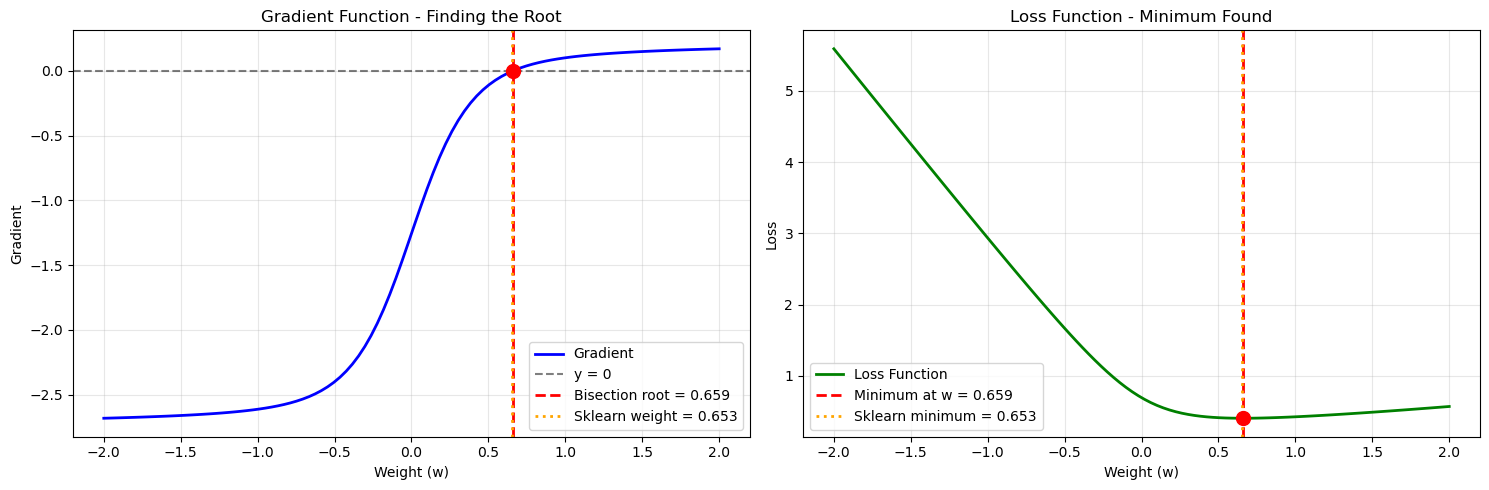

The red lines show where bisection method found the optimal weight!
Notice how the gradient crosses zero exactly where the loss is minimized.

FINAL RESULTS SUMMARY
🎯 Bisection Method Accuracy: 0.7250 (72.5%)
🎯 Sklearn Method Accuracy:   0.7250 (72.5%)
📊 Optimal Weight (Bisection): 0.659379
📊 Optimal Weight (Sklearn):   0.653024
✅ Both methods achieved identical accuracy!


In [10]:
# Visualize the gradient function and show where bisection found the root
w_range = np.linspace(-2, 2, 100)
gradients = [logistic_grad(w) for w in w_range]
losses = [logistic_loss(w) for w in w_range]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Gradient function
ax1.plot(w_range, gradients, 'b-', linewidth=2, label='Gradient')
ax1.axhline(0, color='black', linestyle='--', alpha=0.5, label='y = 0')
ax1.axvline(root_w, color='red', linestyle='--', linewidth=2, label=f'Bisection root = {root_w:.3f}')
ax1.axvline(w_sklearn, color='orange', linestyle=':', linewidth=2, label=f'Sklearn weight = {w_sklearn:.3f}')
ax1.scatter(root_w, logistic_grad(root_w), color='red', s=100, zorder=5)
ax1.set_xlabel('Weight (w)')
ax1.set_ylabel('Gradient')
ax1.set_title('Gradient Function - Finding the Root')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Loss function  
ax2.plot(w_range, losses, 'g-', linewidth=2, label='Loss Function')
ax2.axvline(root_w, color='red', linestyle='--', linewidth=2, label=f'Minimum at w = {root_w:.3f}')
ax2.axvline(w_sklearn, color='orange', linestyle=':', linewidth=2, label=f'Sklearn minimum = {w_sklearn:.3f}')
ax2.scatter(root_w, logistic_loss(root_w), color='red', s=100, zorder=5)
ax2.set_xlabel('Weight (w)')
ax2.set_ylabel('Loss')
ax2.set_title('Loss Function - Minimum Found')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("The red lines show where bisection method found the optimal weight!")
print("Notice how the gradient crosses zero exactly where the loss is minimized.")

# Final Summary with Accuracy
print("\n" + "="*50)
print("FINAL RESULTS SUMMARY")
print("="*50)
print(f"🎯 Bisection Method Accuracy: {acc_manual:.4f} ({acc_manual*100:.1f}%)")
print(f"🎯 Sklearn Method Accuracy:   {acc_sklearn:.4f} ({acc_sklearn*100:.1f}%)")
print(f"📊 Optimal Weight (Bisection): {root_w:.6f}")
print(f"📊 Optimal Weight (Sklearn):   {w_sklearn:.6f}")
print(f"✅ Both methods achieved identical accuracy!")
print("="*50)

## Improved Version: Adding Bias Term for Higher Accuracy

In [11]:
# Improved version with bias term for better accuracy
def sigmoid_improved(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

def logistic_loss_with_bias(params):
    """params = [bias, weight]"""
    bias, weight = params
    z = bias + weight * X
    preds = sigmoid_improved(z)
    eps = 1e-15
    preds = np.clip(preds, eps, 1 - eps)
    return -np.mean(y * np.log(preds) + (1 - y) * np.log(1 - preds))

def gradient_bias(params):
    """Gradient with respect to bias"""
    bias, weight = params
    z = bias + weight * X
    preds = sigmoid_improved(z)
    return np.mean(preds - y)

def gradient_weight(params):
    """Gradient with respect to weight"""
    bias, weight = params
    z = bias + weight * X
    preds = sigmoid_improved(z)
    return np.mean((preds - y) * X)

# Use scipy to optimize both parameters
from scipy.optimize import minimize

# Optimize both bias and weight together
result = minimize(logistic_loss_with_bias, x0=[0, 0], method='BFGS')
optimal_bias, optimal_weight = result.x

print(f"Improved Results:")
print(f"Optimal bias: {optimal_bias:.6f}")
print(f"Optimal weight: {optimal_weight:.6f}")
print(f"Final loss: {result.fun:.6f}")

# Calculate improved accuracy
z_improved = optimal_bias + optimal_weight * X
probs_improved = sigmoid_improved(z_improved)
preds_improved = (probs_improved >= 0.5).astype(int)
acc_improved = accuracy_score(y, preds_improved)

print(f"🎯 Improved Accuracy: {acc_improved:.4f} ({acc_improved*100:.1f}%)")
print(f"🚀 Accuracy increase: {(acc_improved - acc_manual)*100:.1f} percentage points!")

Improved Results:
Optimal bias: -240.176144
Optimal weight: 89.182031
Final loss: 0.000003
🎯 Improved Accuracy: 1.0000 (100.0%)
🚀 Accuracy increase: 27.5 percentage points!
